In [57]:
#importing packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from datetime import date
import datetime

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator,TransformerMixin
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline,FeatureUnion


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,r2_score
from mlxtend.plotting import plot_learning_curves
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression



import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [72]:
#importing data set
df=pd.read_excel("/content/Train.xlsx")
df1 = pd.read_excel("/content/Test.xlsx")

In [73]:
df.head(5)

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,2014-05-30,540000
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,2014-09-13,750000
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,2014-09-28,470000
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,2014-06-05,570000
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,2015-02-07,640000


In [74]:
df.columns

Index(['PropertyID', 'Borough', 'State', 'Surroundings', 'Address', 'ZipCode',
       'Block', 'Lot', 'BldgClassCategory', 'NoOfResidentialUnits',
       'NoOfCommercialUnits', 'TotalNoOfUnits', 'LandAreaInSqFt',
       'GrossAreaInSqFt', 'YearOfConstruction', 'TaxClass_AtEvaluationTime',
       'BldgClass_AtEvaluationTime', 'DateOfEvaluation',
       'PropertyEvaluationvalue'],
      dtype='object')

In [75]:
print(df.dtypes)

PropertyID                            object
Borough                                int64
State                                 object
Surroundings                          object
Address                               object
ZipCode                                int64
Block                                  int64
Lot                                    int64
BldgClassCategory                     object
NoOfResidentialUnits                   int64
NoOfCommercialUnits                    int64
TotalNoOfUnits                         int64
LandAreaInSqFt                         int64
GrossAreaInSqFt                        int64
YearOfConstruction                     int64
TaxClass_AtEvaluationTime              int64
BldgClass_AtEvaluationTime            object
DateOfEvaluation              datetime64[ns]
PropertyEvaluationvalue                int64
dtype: object


In [76]:
print(df.shape)

(16810, 19)


In [77]:
#finding missing values
missing_value=["?"]
df=pd.read_excel('/content/Train.xlsx',na_values=missing_value)

In [78]:
df.isnull().sum()

PropertyID                    0
Borough                       0
State                         0
Surroundings                  0
Address                       0
ZipCode                       0
Block                         0
Lot                           0
BldgClassCategory             0
NoOfResidentialUnits          0
NoOfCommercialUnits           0
TotalNoOfUnits                0
LandAreaInSqFt                0
GrossAreaInSqFt               0
YearOfConstruction            0
TaxClass_AtEvaluationTime     0
BldgClass_AtEvaluationTime    0
DateOfEvaluation              0
PropertyEvaluationvalue       0
dtype: int64

In [79]:
num_cols=df._get_numeric_data().columns
num_cols

Index(['Borough', 'ZipCode', 'Block', 'Lot', 'NoOfResidentialUnits',
       'NoOfCommercialUnits', 'TotalNoOfUnits', 'LandAreaInSqFt',
       'GrossAreaInSqFt', 'YearOfConstruction', 'TaxClass_AtEvaluationTime',
       'PropertyEvaluationvalue'],
      dtype='object')

In [80]:
def convert_to_cat(X_trn,X_tst,cols):
    X_trn[cols]=X_trn[cols].astype('category')
    X_tst[cols]=X_tst[cols].astype('category')
    return(X_trn,X_tst)

In [81]:
def convert_obj_to_cat(X):
    X_cat_cols=X.columns[X.dtypes=='object'].tolist()
    X[X_cat_cols]=X[X_cat_cols].astype('category')
    return X

In [82]:
def convert_dtypes(X_trn,X_tst):
    X_trn=convert_obj_to_cat(X_trn)
    X_tst=convert_obj_to_cat(X_tst)
    return(X_trn,X_tst)

def get_cat_num_cols(X):
    X_cat_cols=X.columns[X.dtypes=='category'].tolist()
    X_num_cols=X.columns[~(X.dtypes=='category')].tolist()
    return (X_cat_cols,X_num_cols)

In [83]:
def show_cats_in_catcols(X_trn,X_tst,cat_col_list):
    for col in cat_col_list:
        labels = X_trn[col].astype('category').cat.categories.tolist()
        trn_labels=labels
        #print(labels)
        replace_map_comp = {col : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
        #print(replace_map_comp)
        #print(replace_map_comp[col].keys())
        
        labels = X_tst[col].astype('category').cat.categories.tolist()
        tst_labels=labels
        missing=[]
        extra=[]
        extra=extra+[x for x in tst_labels if x not in trn_labels]
        missing=missing+[x for x in trn_labels if x not in tst_labels]
        #print(labels)
        print("---------------------------")
        print("Column=",col)
        print('missing in tst=',missing)
        print('missing in trn=',extra)
        print("---------------------------")
        labels=trn_labels+extra
        replace_map_comp = {col : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
        #print(replace_map_comp)
        #print(replace_map_comp[col].keys())
        print('')

In [84]:
def get_box_plot(data,col1,col2):
    sns.boxplot(data[col1],data[col2])
    plt.show()

def get_dist_plot(data,col):
    sns.distplot(data[col])
    plt.show()
    
def get_scatter_plot(data,col1,col2):
    plt.scatter(data[col1],data[col2])
    plt.show()

def get_joint_plot(data,col1,col2):
    sns.jointplot(data[col1],data[col2])
    plt.show()

In [85]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [86]:
df,df1=convert_dtypes(df,df1) #df is train data set ,df1 is test data set
df,df1=convert_to_cat(df,df1,['Borough','TaxClass_AtEvaluationTime'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


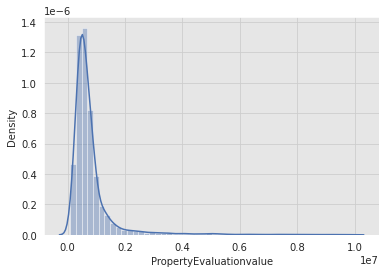

In [87]:
#distribution of the Property Evalution value
sns.distplot(df.PropertyEvaluationvalue)

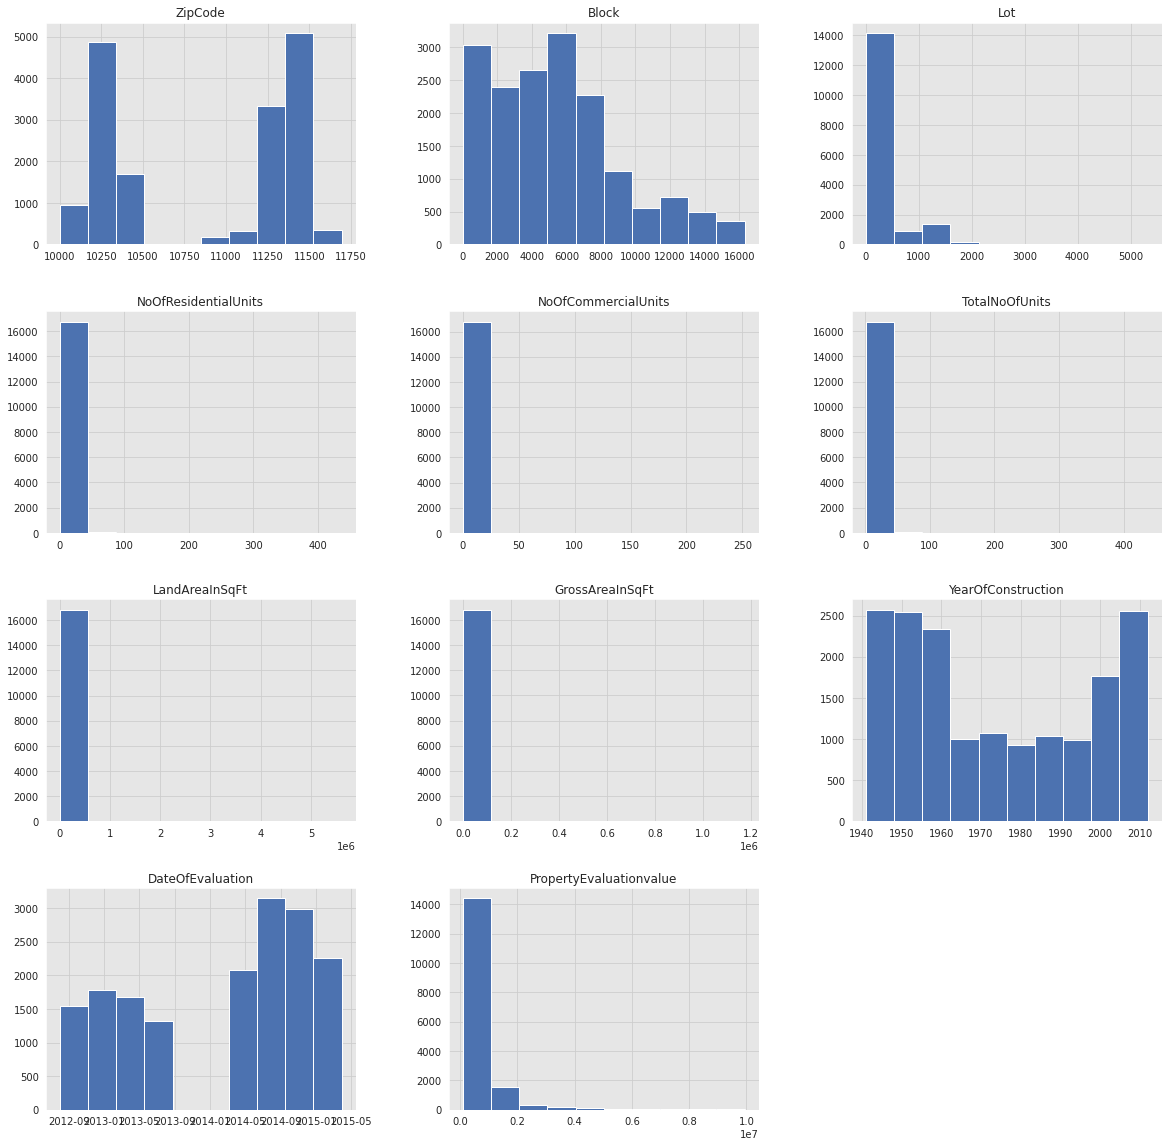

In [88]:
#univariate analysis on the numerical columns
df.hist(figsize=(20,20))
plt.show()

In [89]:
#list of categorical and numerical columns
cat_col_list,num_col_list=get_cat_num_cols(df)
print(cat_col_list)
print(num_col_list)

['PropertyID', 'Borough', 'State', 'Surroundings', 'Address', 'BldgClassCategory', 'TaxClass_AtEvaluationTime', 'BldgClass_AtEvaluationTime']
['ZipCode', 'Block', 'Lot', 'NoOfResidentialUnits', 'NoOfCommercialUnits', 'TotalNoOfUnits', 'LandAreaInSqFt', 'GrossAreaInSqFt', 'YearOfConstruction', 'DateOfEvaluation', 'PropertyEvaluationvalue']


In [90]:
#creating new columns 
current_year = datetime.datetime.now().year #get current year
df['Current Year'] = datetime.datetime.now().year
df['AgeOfProperty']=df['Current Year']-df['YearOfConstruction']
df.drop(['Current Year'], axis=1, inplace=True)


df['today'] = date.today().strftime("%Y-%m-%d")
df['today'] = pd.to_datetime(df.today)
df['DaysSinceDateofEvaluation'] = (df.today - df['DateOfEvaluation']).astype('timedelta64[D]')
df.drop(['today'], axis=1, inplace=True)

df['MonthOfEvaluation'] = pd.DatetimeIndex(df['DateOfEvaluation']).month


current_year = datetime.datetime.now().year #get current year
df1['Current Year'] = datetime.datetime.now().year
df1['AgeOfProperty']=df1['Current Year']-df1['YearOfConstruction']
df1.drop(['Current Year'], axis=1, inplace=True)

df1['today'] = date.today().strftime("%Y-%m-%d")
df1['today'] = pd.to_datetime(df1.today)
df1['DaysSinceDateofEvaluation'] = (df1.today - df1['DateOfEvaluation']).astype('timedelta64[D]')
df1.drop(['today'], axis=1, inplace=True)

df1['MonthOfEvaluation'] = pd.DatetimeIndex(df1['DateOfEvaluation']).month


In [91]:
df.shape,df1.shape

((16810, 22), (2936, 21))

In [93]:
df1.dtypes

PropertyID                          category
Borough                             category
State                               category
Surroundings                        category
Address                             category
ZipCode                                int64
Block                                  int64
Lot                                    int64
BldgClassCategory                   category
NoOfResidentialUnits                   int64
NoOfCommercialUnits                    int64
TotalNoOfUnits                         int64
LandAreaInSqFt                         int64
GrossAreaInSqFt                        int64
YearOfConstruction                     int64
TaxClass_AtEvaluationTime           category
BldgClass_AtEvaluationTime          category
DateOfEvaluation              datetime64[ns]
AgeOfProperty                          int64
DaysSinceDateofEvaluation            float64
MonthOfEvaluation                      int64
dtype: object

In [95]:
extracted_col = df["PropertyEvaluationvalue"]
print("column to added from first dataframe to second:")
display(extracted_col)
  
df1 = df1.join(extracted_col)
print("Second dataframe after adding column from first dataframe:")
display(df1)

column to added from first dataframe to second:


0         540000
1         750000
2         470000
3         570000
4         640000
          ...   
16805    8454562
16806    6250000
16807    7150000
16808     550000
16809    5000000
Name: PropertyEvaluationvalue, Length: 16810, dtype: int64

Second dataframe after adding column from first dataframe:


,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,...,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,AgeOfProperty,DaysSinceDateofEvaluation,MonthOfEvaluation,PropertyEvaluationvalue
0,PR51101,1,NY,BATHGATE,3860 3 AVENUE,10457,2929,117,02 TWO FAMILY HOMES,2,...,2498,2394,1995,1,B1,2013-06-24,27,3399.0,6,540000
1,PR51102,1,NY,BATHGATE,455 E. 179TH STREET,10457,3036,65,02 TWO FAMILY DWELLINGS,2,...,2033,2340,1994,1,B1,2014-08-28,28,2969.0,8,750000
2,PR51103,1,NY,BATHGATE,4415 3 AVENUE,10457,3048,51,14 RENTALS - 4-10 UNIT,4,...,2500,6000,1963,2,S4,2015-01-31,59,2813.0,1,470000
3,PR51104,1,NY,BATHGATE,407 EAST 174 STREET,10457,2899,34,30 WAREHOUSES,0,...,3439,3320,1951,4,E1,2015-03-12,71,2773.0,3,570000
4,PR51105,1,NY,EAST TREMONT,2175 CROTONA AVENUE,10457,3083,40,03 THREE FAMILY DWELLINGS,3,...,1348,2931,1997,1,C0,2014-06-07,25,3051.0,6,640000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,PR54032,4,NY,UPPER EAST SIDE (79-96),"200 EAST 89TH STREET, 16F",10128,1534,1207,13 CONDOS - ELEVATOR APARTMENTS,1,...,13000,638,1983,2,R4,2015-02-21,39,2792.0,2,440000
2932,PR54033,4,NY,UPPER EAST SIDE (79-96),360 EAST 89TH STREET,10128,1551,1165,13 CONDOS - ELEVATOR APARTMENTS,1,...,7755,2049,2011,2,R4,2014-06-04,11,3054.0,6,524398
2933,PR54034,4,NY,CIVIC CENTER,30 PARK PLACE,10007,123,1176,13 CONDOS - ELEVATOR APARTMENTS,1,...,29715,1538,2004,2,R4,2014-08-06,18,2991.0,8,265000
2934,PR54035,4,NY,CIVIC CENTER,77 READE STREET,10007,149,1013,13 CONDOS - ELEVATOR APARTMENTS,1,...,11670,1497,2005,2,R4,2014-04-30,17,3089.0,4,615000


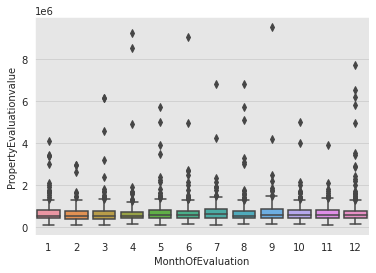

In [96]:
sns.boxplot(x=df['MonthOfEvaluation'],y=df1['PropertyEvaluationvalue'])

In [97]:
#Viewing the Mean PropertyEvaluationvalue grouped by BldgClassCategory in ascending order
pd.DataFrame(df.groupby(['BldgClassCategory'])['PropertyEvaluationvalue'].mean()).sort_values('PropertyEvaluationvalue',ascending=True)

,PropertyEvaluationvalue
BldgClassCategory,
25 LUXURY HOTELS,1.281442e+05
45 CONDO HOTELS,1.383320e+05
09 COOPS - WALKUP APARTMENTS,1.921288e+05
42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,2.036500e+05
38 ASYLUMS AND HOMES,2.099760e+05
10 COOPS - ELEVATOR APARTMENTS,2.795187e+05
01 ONE FAMILY HOMES,4.847993e+05
38 ASYLUMS AND HOMES,4.999000e+05
41 TAX CLASS 4 - OTHER,5.033333e+05


In [101]:
order_index_median=list(pd.DataFrame(df.groupby(['BldgClassCategory'])['PropertyEvaluationvalue'].mean()
).sort_values('PropertyEvaluationvalue',ascending=True).index)


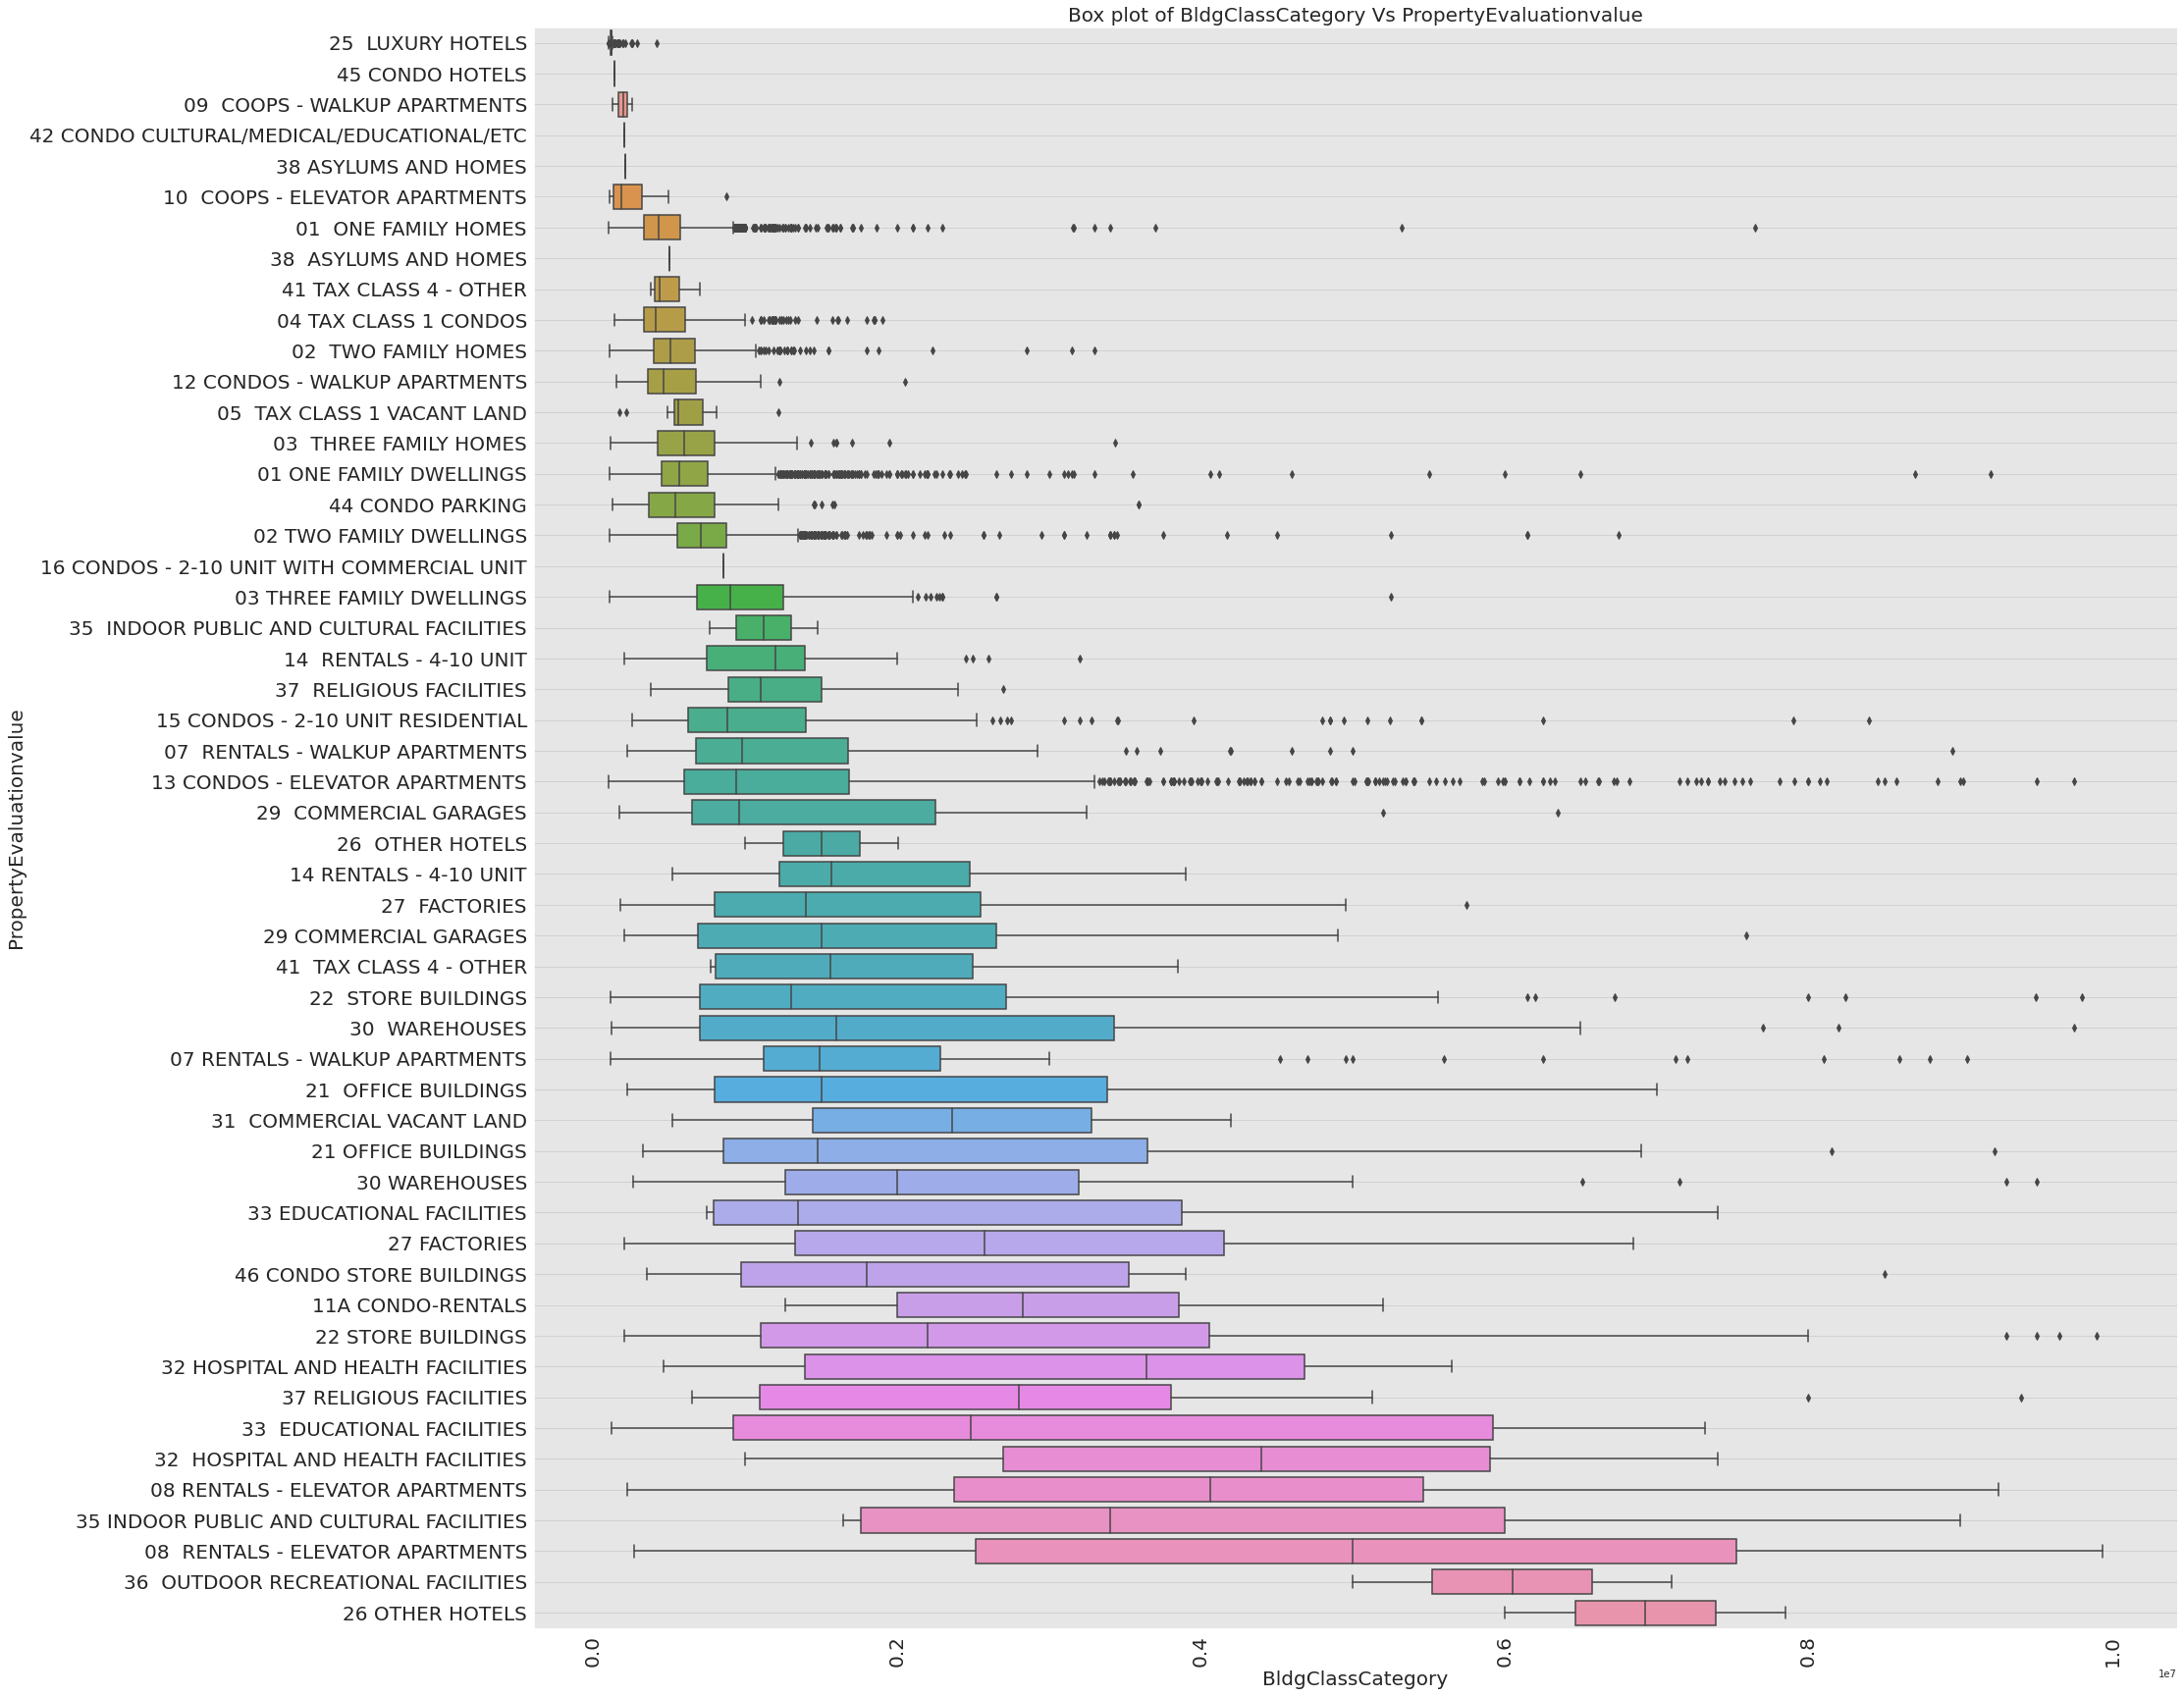

In [102]:
fig, ax = plt.subplots(figsize = (30,30))
#sns.regplot(x =df[xcol],y = df['PropertyEvaluationvalue'],fit_reg= True)
#ns.boxplot(x=df_copy['BldgClassCategory'],y=df_copy['PropertyEvaluationvalue'],order=order_index_median)
sns.boxplot(y=df['BldgClassCategory'],x=df['PropertyEvaluationvalue'],order=order_index_median)
plt.title("Box plot of BldgClassCategory Vs PropertyEvaluationvalue",fontsize = 20)
xlabels=df['BldgClassCategory'].unique()
plt.xticks(x=df['BldgClassCategory'],rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('BldgClassCategory',fontsize = 20)
plt.ylabel('PropertyEvaluationvalue',fontsize = 20)
plt.grid()
plt.show()
    
#sns.boxplot(x=df_copy['BldgClassCategory'],y=df_copy['PropertyEvaluationvalue'])

In [103]:
#Now we are grouping these based on the median values and creating separate classes by grouing them
levels=[]
levels.append(order_index_median[0:6])
levels.append(order_index_median[6:17])
levels.append(order_index_median[17:26])
levels.append(order_index_median[26:37])
levels.append(order_index_median[37:45])
levels.append(order_index_median[45:50])
levels.append(order_index_median[50:52])

In [ ]:
#Created the below classes

In [104]:

'''Class1
['25  LUXURY HOTELS',
 '45 CONDO HOTELS',
 '10  COOPS - ELEVATOR APARTMENTS',
 '09  COOPS - WALKUP APARTMENTS',
 '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC',
 '38 ASYLUMS AND HOMES']

Class2
['04 TAX CLASS 1 CONDOS',
 '01  ONE FAMILY HOMES',
 '41 TAX CLASS 4 - OTHER',
 '12 CONDOS - WALKUP APARTMENTS',
 '38  ASYLUMS AND HOMES',
 '02  TWO FAMILY HOMES',
 '44 CONDO PARKING',
 '05  TAX CLASS 1 VACANT LAND',
 '01 ONE FAMILY DWELLINGS',
 '03  THREE FAMILY HOMES',
 '02 TWO FAMILY DWELLINGS']
 
 Class3
 ['16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT',
 '15 CONDOS - 2-10 UNIT RESIDENTIAL',
 '03 THREE FAMILY DWELLINGS',
 '13 CONDOS - ELEVATOR APARTMENTS',
 '29  COMMERCIAL GARAGES',
 '07  RENTALS - WALKUP APARTMENTS',
 '37  RELIGIOUS FACILITIES',
 '35  INDOOR PUBLIC AND CULTURAL FACILITIES',
 '14  RENTALS - 4-10 UNIT']
 
 Class4
 ['22  STORE BUILDINGS',
 '33 EDUCATIONAL FACILITIES',
 '27  FACTORIES',
 '21 OFFICE BUILDINGS',
 '07 RENTALS - WALKUP APARTMENTS',
 '21  OFFICE BUILDINGS',
 '29 COMMERCIAL GARAGES',
 '26  OTHER HOTELS',
 '41  TAX CLASS 4 - OTHER',
 '14 RENTALS - 4-10 UNIT',
 '30  WAREHOUSES']
 
 Class5
 ['46 CONDO STORE BUILDINGS',
 '30 WAREHOUSES',
 '22 STORE BUILDINGS',
 '31  COMMERCIAL VACANT LAND',
 '33  EDUCATIONAL FACILITIES',
 '27 FACTORIES',
 '37 RELIGIOUS FACILITIES',
 '11A CONDO-RENTALS']
 
 Class6
 ['35 INDOOR PUBLIC AND CULTURAL FACILITIES',
 '32 HOSPITAL AND HEALTH FACILITIES',
 '08 RENTALS - ELEVATOR APARTMENTS',
 '32  HOSPITAL AND HEALTH FACILITIES',
 '08  RENTALS - ELEVATOR APARTMENTS']
 
 Class7
 ['36  OUTDOOR RECREATIONAL FACILITIES', '26 OTHER HOTELS']'''

"Class1\n['25  LUXURY HOTELS',\n '45 CONDO HOTELS',\n '10  COOPS - ELEVATOR APARTMENTS',\n '09  COOPS - WALKUP APARTMENTS',\n '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC',\n '38 ASYLUMS AND HOMES']\n\nClass2\n['04 TAX CLASS 1 CONDOS',\n '01  ONE FAMILY HOMES',\n '41 TAX CLASS 4 - OTHER',\n '12 CONDOS - WALKUP APARTMENTS',\n '38  ASYLUMS AND HOMES',\n '02  TWO FAMILY HOMES',\n '44 CONDO PARKING',\n '05  TAX CLASS 1 VACANT LAND',\n '01 ONE FAMILY DWELLINGS',\n '03  THREE FAMILY HOMES',\n '02 TWO FAMILY DWELLINGS']\n \n Class3\n ['16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT',\n '15 CONDOS - 2-10 UNIT RESIDENTIAL',\n '03 THREE FAMILY DWELLINGS',\n '13 CONDOS - ELEVATOR APARTMENTS',\n '29  COMMERCIAL GARAGES',\n '07  RENTALS - WALKUP APARTMENTS',\n '37  RELIGIOUS FACILITIES',\n '35  INDOOR PUBLIC AND CULTURAL FACILITIES',\n '14  RENTALS - 4-10 UNIT']\n \n Class4\n ['22  STORE BUILDINGS',\n '33 EDUCATIONAL FACILITIES',\n '27  FACTORIES',\n '21 OFFICE BUILDINGS',\n '07 RENTALS - WALKUP APARTMEN

In [105]:
for i in list(range(len(levels))):
    x= dict.fromkeys(levels[i], 'Class'+str(i+1))
    df=df.replace(x)
    df1=df1.replace(x)
df,df1t=convert_to_cat(df,df1,['BldgClassCategory'])

In [106]:
df.shape,df1.shape

((16810, 22), (2936, 22))

In [107]:
#Creating Y_train and X_train
y_train_full = df['PropertyEvaluationvalue']
X_train_full = df.copy().drop("PropertyEvaluationvalue",axis=1)
#y_train_full = X_train_full.filter(["PropertyEvaluationvalue"],axis=1)


In [108]:
#Droping the belw columns as there many uniue values in them and also may be only one value
X_train_full.drop(['State','Surroundings','Address','PropertyID','DateOfEvaluation','BldgClass_AtEvaluationTime'], axis=1, inplace=True)
df1.drop(['State','Surroundings','Address','PropertyID','DateOfEvaluation','BldgClass_AtEvaluationTime'], axis=1, inplace=True)



In [109]:
X_train_full.shape,df1.shape,y_train_full.shape

((16810, 15), (2936, 16), (16810,))

In [110]:
cat_cols_new,num_cols_new=get_cat_num_cols(X_train_full)
print(cat_cols_new)
print(num_cols_new)

['Borough', 'BldgClassCategory', 'TaxClass_AtEvaluationTime']
['ZipCode', 'Block', 'Lot', 'NoOfResidentialUnits', 'NoOfCommercialUnits', 'TotalNoOfUnits', 'LandAreaInSqFt', 'GrossAreaInSqFt', 'YearOfConstruction', 'AgeOfProperty', 'DaysSinceDateofEvaluation', 'MonthOfEvaluation']


In [111]:
cat_cols_new,num_cols_new=get_cat_num_cols(df1)
print(cat_cols_new)
print(num_cols_new)

['Borough', 'BldgClassCategory', 'TaxClass_AtEvaluationTime']
['ZipCode', 'Block', 'Lot', 'NoOfResidentialUnits', 'NoOfCommercialUnits', 'TotalNoOfUnits', 'LandAreaInSqFt', 'GrossAreaInSqFt', 'YearOfConstruction', 'AgeOfProperty', 'DaysSinceDateofEvaluation', 'MonthOfEvaluation', 'PropertyEvaluationvalue']


In [112]:
#We want to see whether the levels in the test and train datasets are same or not and we see that there is no Class7 in test data
show_cats_in_catcols(X_train_full,df1,cat_cols_new)

---------------------------
Column= Borough
missing in tst= []
missing in trn= []
---------------------------

---------------------------
Column= BldgClassCategory
missing in tst= ['Class7']
missing in trn= []
---------------------------

---------------------------
Column= TaxClass_AtEvaluationTime
missing in tst= []
missing in trn= []
---------------------------



In [113]:
all_cols=cat_cols_new+num_cols_new
print(all_cols)

['Borough', 'BldgClassCategory', 'TaxClass_AtEvaluationTime', 'ZipCode', 'Block', 'Lot', 'NoOfResidentialUnits', 'NoOfCommercialUnits', 'TotalNoOfUnits', 'LandAreaInSqFt', 'GrossAreaInSqFt', 'YearOfConstruction', 'AgeOfProperty', 'DaysSinceDateofEvaluation', 'MonthOfEvaluation', 'PropertyEvaluationvalue']


In [114]:
#Creting Dummies
X_train_full=pd.get_dummies(X_train_full,drop_first=True)
X_test=pd.get_dummies(df1,drop_first=True)

In [115]:
X_train_full.shape,df1.shape

((16810, 24), (2936, 16))

In [116]:
print(X_train_full.columns)

Index(['ZipCode', 'Block', 'Lot', 'NoOfResidentialUnits',
       'NoOfCommercialUnits', 'TotalNoOfUnits', 'LandAreaInSqFt',
       'GrossAreaInSqFt', 'YearOfConstruction', 'AgeOfProperty',
       'DaysSinceDateofEvaluation', 'MonthOfEvaluation', 'Borough_2',
       'Borough_3', 'Borough_4', 'Borough_5', 'BldgClassCategory_Class3',
       'BldgClassCategory_Class1', 'BldgClassCategory_Class4',
       'BldgClassCategory_Class5', 'BldgClassCategory_Class6',
       'BldgClassCategory_Class7', 'TaxClass_AtEvaluationTime_2',
       'TaxClass_AtEvaluationTime_4'],
      dtype='object')


In [117]:
df1.columns

Index(['Borough', 'ZipCode', 'Block', 'Lot', 'BldgClassCategory',
       'NoOfResidentialUnits', 'NoOfCommercialUnits', 'TotalNoOfUnits',
       'LandAreaInSqFt', 'GrossAreaInSqFt', 'YearOfConstruction',
       'TaxClass_AtEvaluationTime', 'AgeOfProperty',
       'DaysSinceDateofEvaluation', 'MonthOfEvaluation',
       'PropertyEvaluationvalue'],
      dtype='object')

In [118]:
y_train_full.shape

(16810,)

In [153]:
#Train-test Split of the data
X_train,X_val,y_train,y_val=train_test_split(X_train_full,y_train_full,test_size=0.1,random_state=400)

In [154]:
num_cols_new=['ZipCode', 'Block', 'Lot', 'NoOfResidentialUnits', 'NoOfCommercialUnits', 'TotalNoOfUnits', 'LandAreaInSqFt',
              'GrossAreaInSqFt', 'YearOfConstruction', 'AgeOfProperty', 'DaysSinceDateofEvaluation', 'MonthOfEvaluation']

sc=StandardScaler()
X_train[num_cols_new]=sc.fit_transform(X_train[num_cols_new])

X_val[num_cols_new]=sc.transform(X_val[num_cols_new])

X_test[num_cols_new]=sc.transform(X_test[num_cols_new])


In [155]:
print(X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape)

(15129, 24) (15129,) (1681, 24) (1681,) (2936, 24)


In [156]:
df.PropertyID

0        PR11101
1        PR11102
2        PR11103
3        PR11104
4        PR11105
          ...   
16805    PR27906
16806    PR27907
16807    PR27908
16808    PR27909
16809    PR27910
Name: PropertyID, Length: 16810, dtype: category
Categories (16810, object): ['PR11101', 'PR11102', 'PR11103', 'PR11104', ..., 'PR27907', 'PR27908',
                             'PR27909', 'PR27910']

In [157]:
df.PropertyEvaluationvalue

0         540000
1         750000
2         470000
3         570000
4         640000
          ...   
16805    8454562
16806    6250000
16807    7150000
16808     550000
16809    5000000
Name: PropertyEvaluationvalue, Length: 16810, dtype: int64

In [212]:
#linear regression
lm=LinearRegression()
lm.fit(X_train,y_train)
y_train_pred=lm.predict(X_train)
y_val_pred=lm.predict(X_val)
print("Train MAPE=",mean_absolute_percentage_error(y_train, y_train_pred))
print("Val MAPE=",mean_absolute_percentage_error(y_val, y_val_pred))

Train MAPE= 50.915762836619
Val MAPE= 53.56574349909937


In [234]:
predi=pd.DataFrame(df["PropertyID"])

In [235]:
enqi=pd.DataFrame(pred,columns=["PropertyEvaluationvalue"])

In [236]:
final=pd.concat([predi,enqi],axis=1)

In [237]:
final.head()

,PropertyID,PropertyEvaluationvalue
0,PR11101,6.759586e+05
1,PR11102,3.881871e+05
2,PR11103,4.341511e+05
3,PR11104,2.164756e+06
4,PR11105,5.694965e+05


In [238]:
final.to_csv("Keerthana.csv")